In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

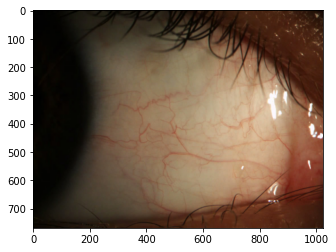

In [49]:
im = cv2.imread("dataset/BN_024_1.1.jpg")
hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

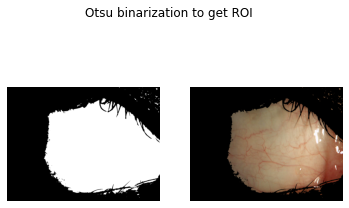

In [51]:

#We use HSV's V Channel to extract ROI for the eye sclera, as it conforms an area of similar brightness

#In order to create a mask for the sclera, Otsu binarization is used, as it automatically finds a threshold that minimizes intra-class variance.
ret2,th2 = cv2.threshold(hsv[:,:,2],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig,ax = plt.subplots(1,2)
fig.suptitle("Otsu binarization to get ROI")
ax[0].imshow(th2,cmap='gray')
ax[0].set_axis_off()
ax[1].imshow(hsv[:,:,2],cmap='gray')
ax[1].set_axis_off()



#Once we have the ROI, we can apply it as a mask for the rest of the procedure.
rgb = cv2.bitwise_and(rgb,rgb,mask=th2)
hsv = cv2.cvtColor(rgb,cv2.COLOR_BGR2HSV)
plt.imshow(rgb)

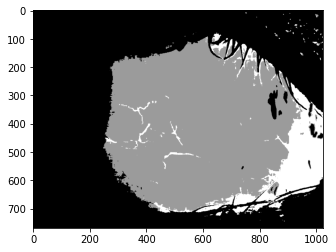

In [64]:
#In order to extract blood vessels in the ROI, we can make use of the S channel, as the blood in the vessels makes that region highly saturated, in contrast to the white,unsaturated sclera.

#ret2,th2 = cv2.threshold(hsv[:,:,1],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
Z = hsv[:,:,1].reshape((-1,1))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
K = 3
ret,label,center = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((hsv[:,:,1].shape))
plt.imshow(res,cmap='gray')

#plt.imshow(hsv[:,:,1],cmap='gray')